<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/ALIGNN_FFvsM3GNET_on_MLEARN_and_ALIGNNFF_DB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install alignn m3gnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.1/285.1 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.3/265.3 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.3/125.3 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 973.8/973.8 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [2]:
import site
site.main()

from pymatgen.core import Structure, Lattice
import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm
import numpy as np
import json
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import functools
from matplotlib import cm
import os
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams['axes.axisbelow'] = True
mpl.rcParams['xtick.labelsize'] = 24
mpl.rcParams['ytick.labelsize'] = 24

In [3]:
# get data from mlearn
#!rm *.json
!for m in Ni Cu Mo Ge Si Li; do wget https://github.com/materialsvirtuallab/mlearn/raw/master/data/${m}/test.json; mv test.json ${m}_test.json; done;
!ls

--2023-05-01 11:04:46--  https://github.com/materialsvirtuallab/mlearn/raw/master/data/Ni/test.json
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/materialsvirtuallab/mlearn/master/data/Ni/test.json [following]
--2023-05-01 11:04:47--  https://raw.githubusercontent.com/materialsvirtuallab/mlearn/master/data/Ni/test.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 611126 (597K) [text/plain]
Saving to: ‘test.json’

test.json           100%[===================>] 596.80K  --.-KB/s    in 0.04s   

2023-05-01 11:04:47 (13.6 MB/s) - ‘test.json’ saved [611126/611126]

--2023-05-01 11:04:47--  https

In [4]:
from ase import Atoms
import numpy as np
import torch
torch.cuda.is_available = lambda : False
import pymatgen.io.ase as aio
from alignn.ff.ff import AlignnAtomwiseCalculator,default_path
model_path = default_path()
calc = AlignnAtomwiseCalculator(path=model_path,stress_wt=0.3)

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)
model_path /usr/local/lib/python3.10/dist-packages/alignn/ff


100%|██████████| 31/31 [10:08<00:00, 19.61s/it]


Material: Ni, F-RMSE: 0.9201409854670073, F-MAE: 0.4411437249910639


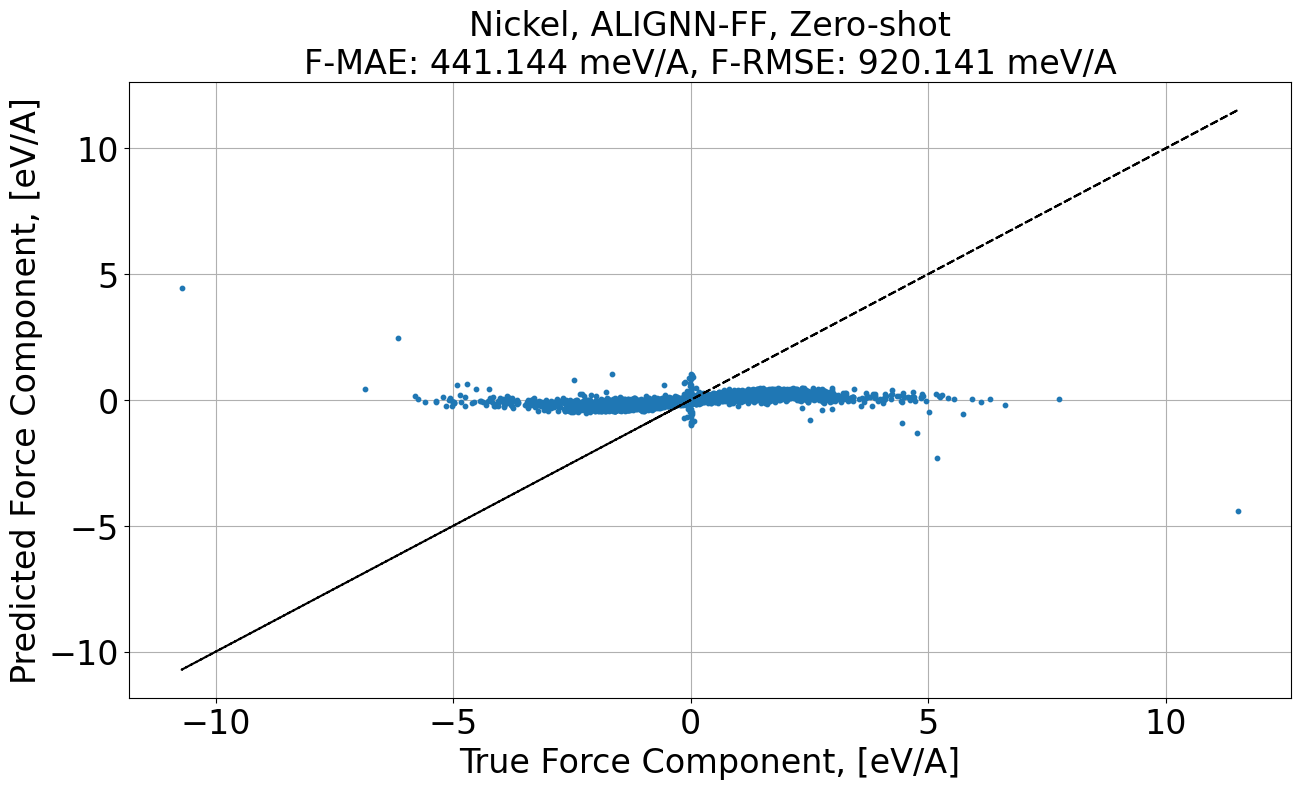

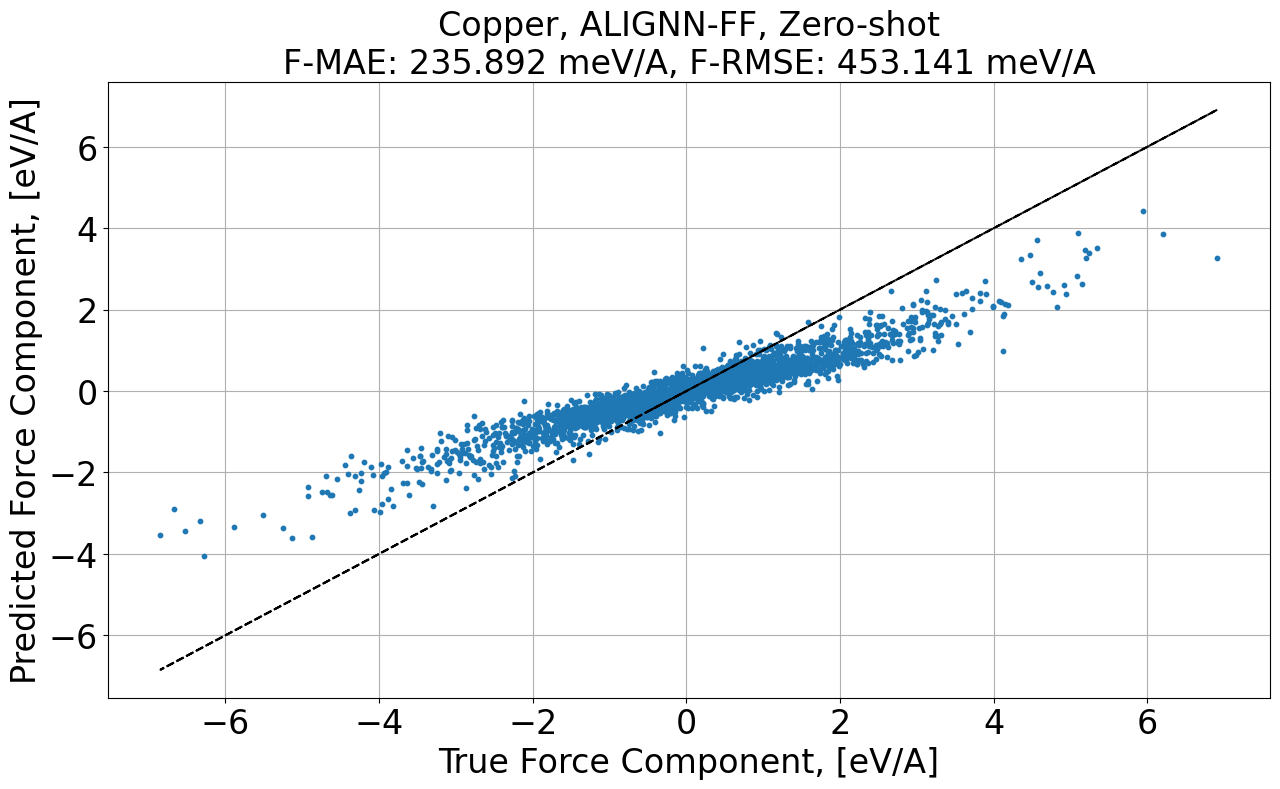

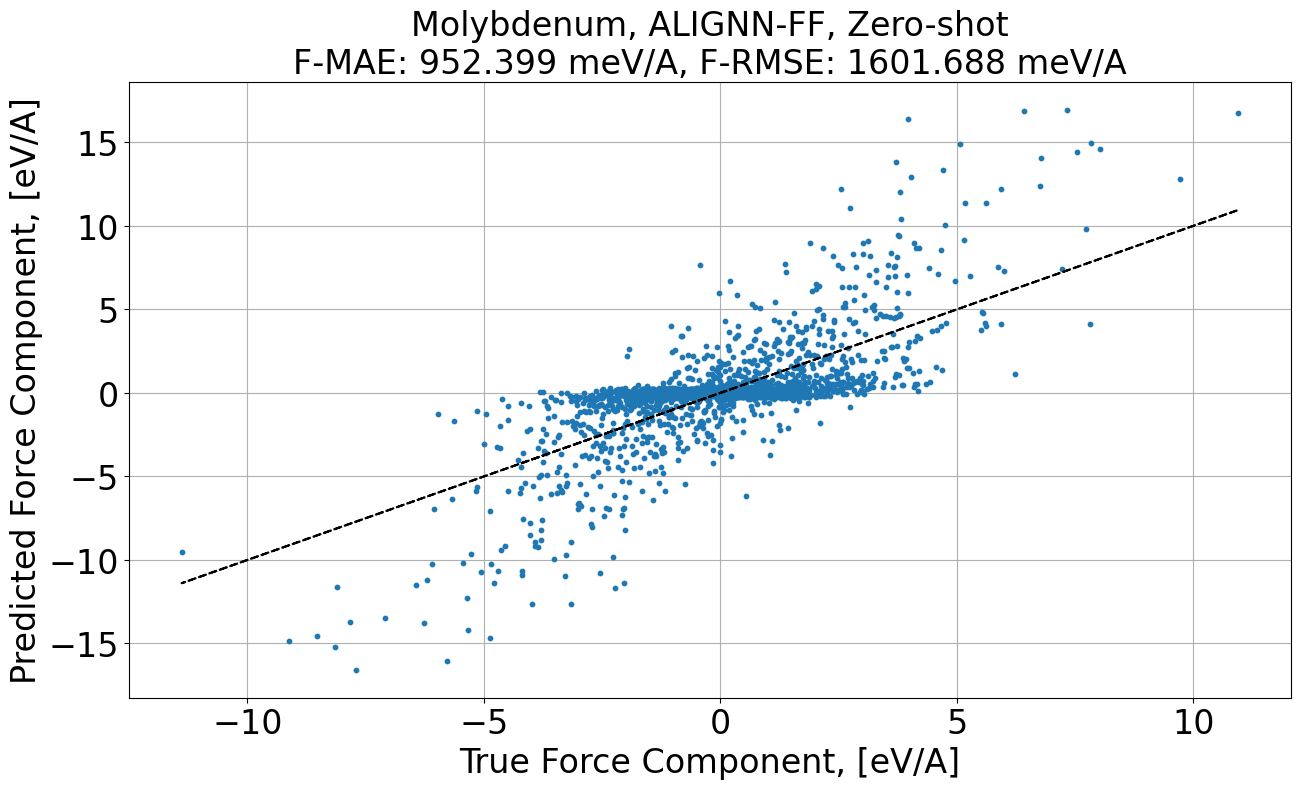

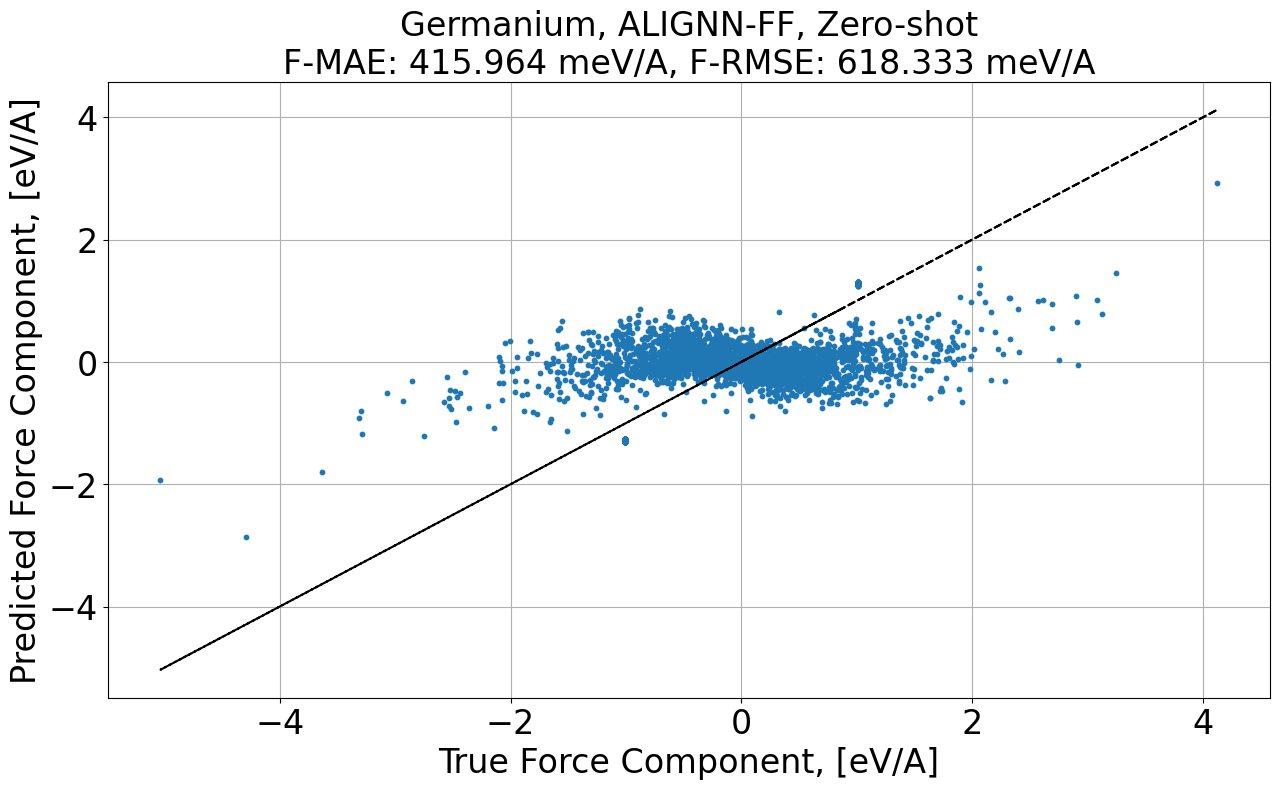

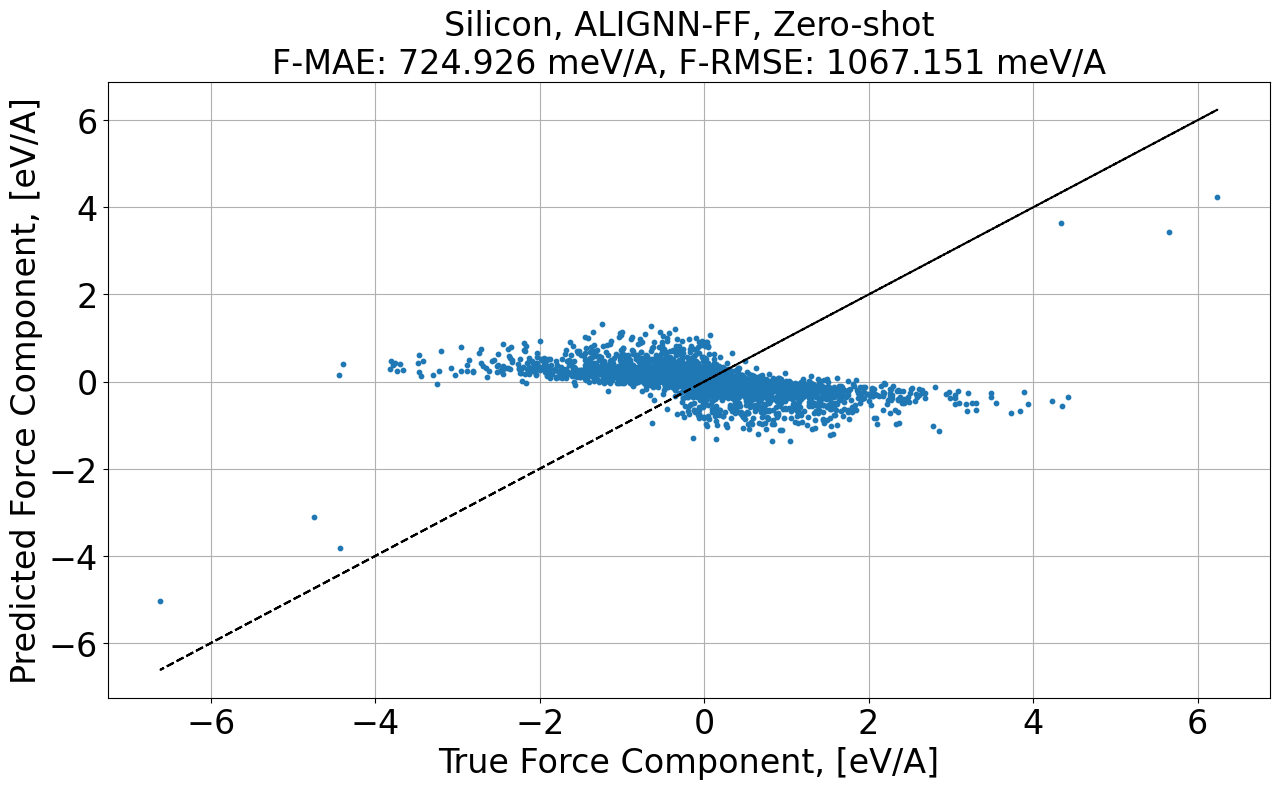

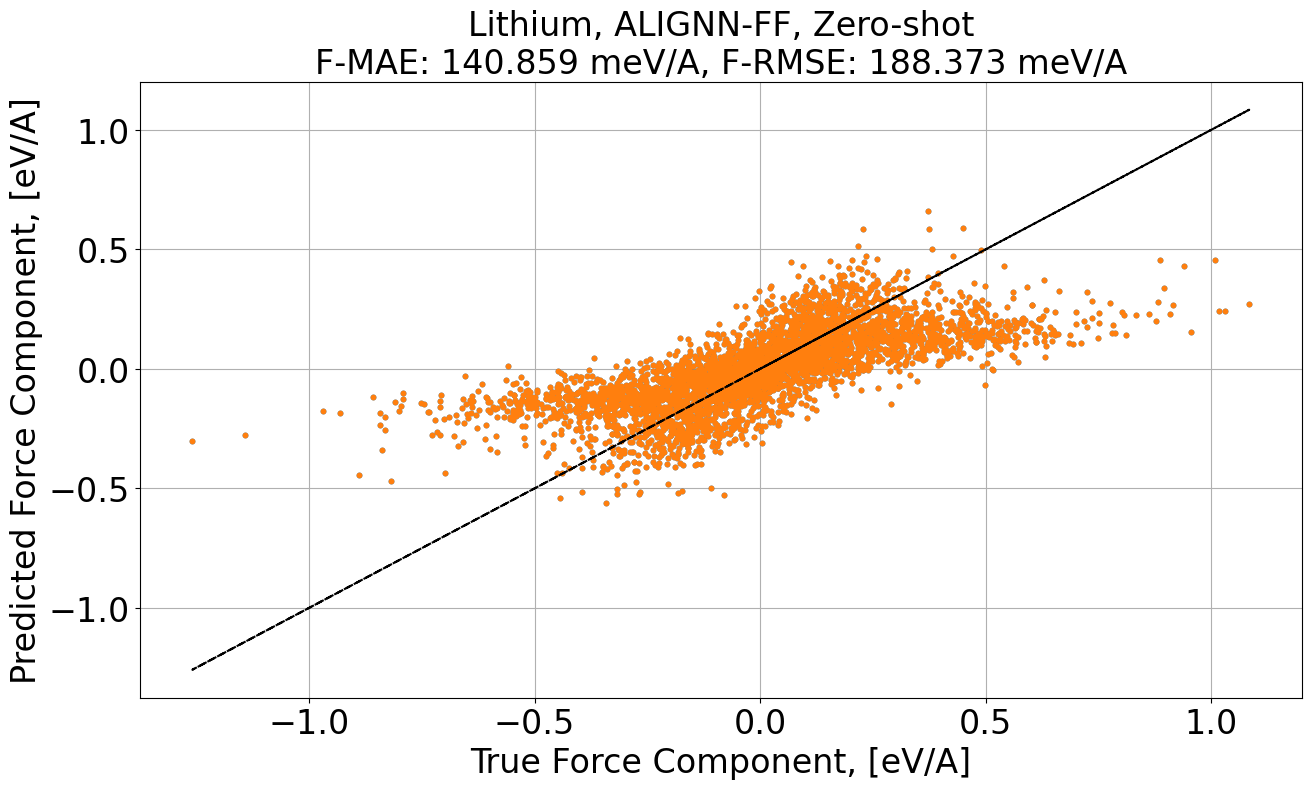

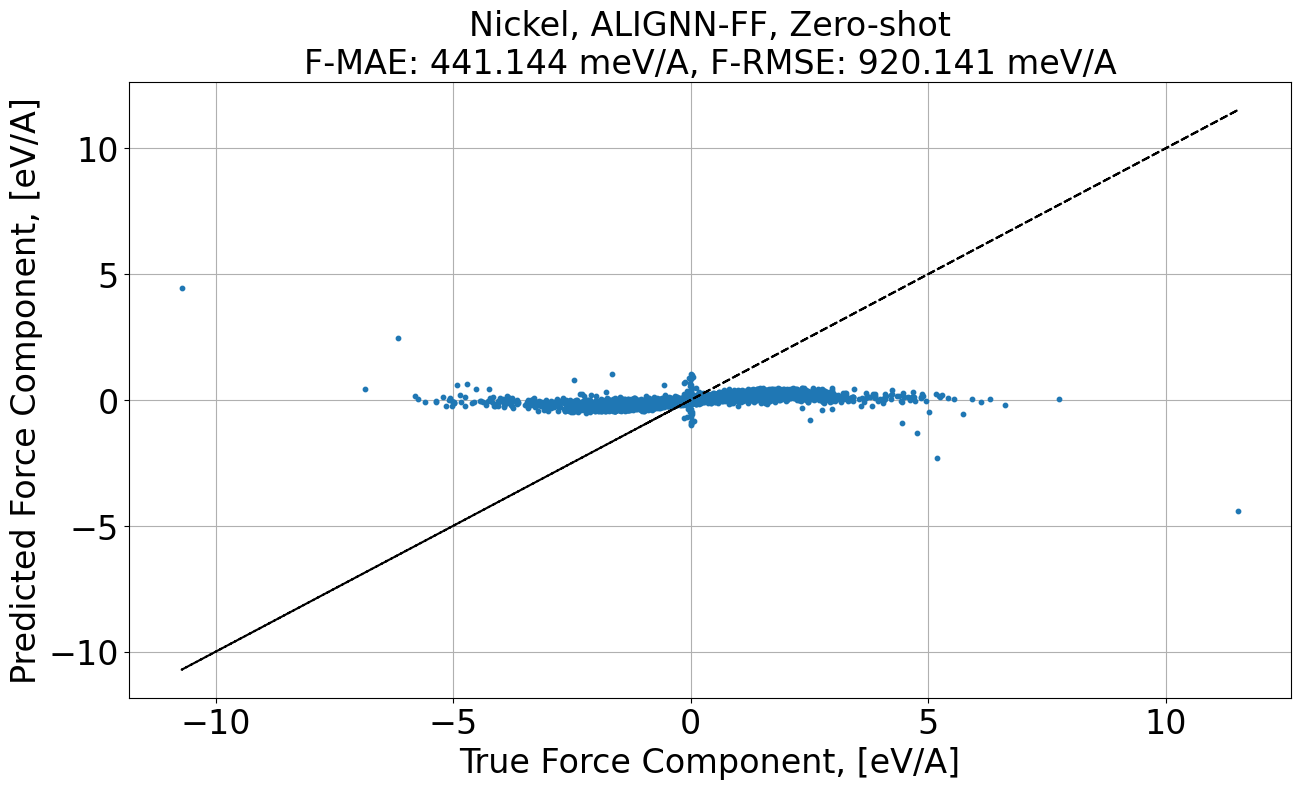

100%|██████████| 31/31 [07:47<00:00, 15.07s/it]


Material: Cu, F-RMSE: 0.4531410844021444, F-MAE: 0.23589232515549807


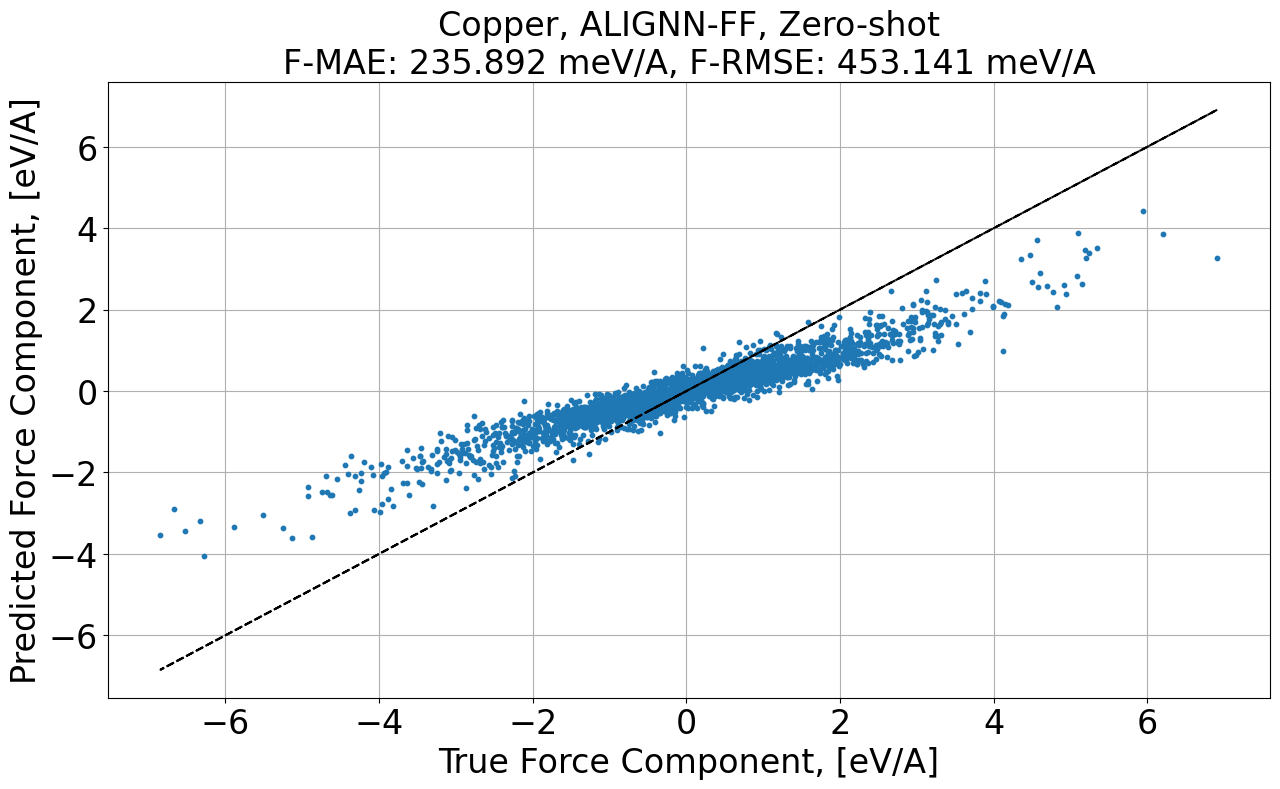

100%|██████████| 23/23 [02:52<00:00,  7.50s/it]


Material: Mo, F-RMSE: 1.6016879228150658, F-MAE: 0.9523994898828192


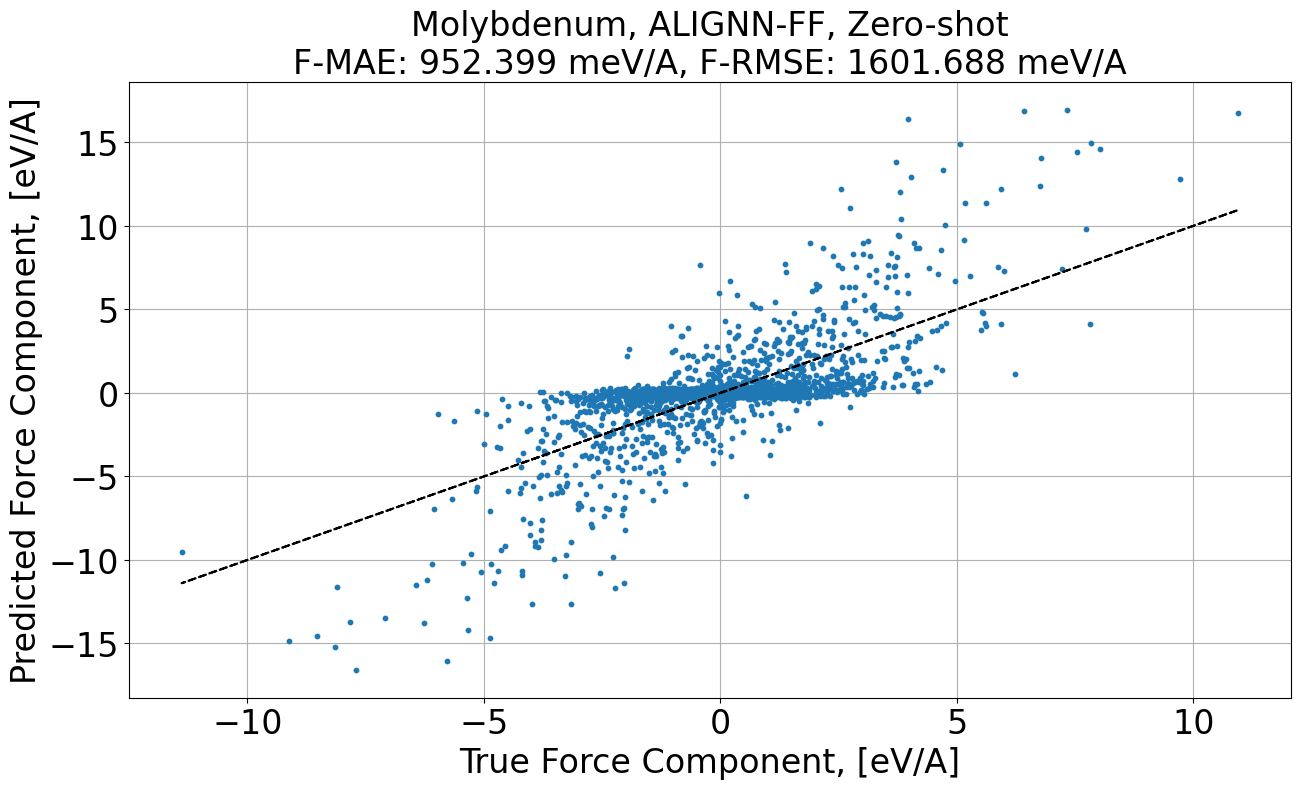

100%|██████████| 25/25 [03:09<00:00,  7.58s/it]


Material: Ge, F-RMSE: 0.6183327918398916, F-MAE: 0.4159635788706367


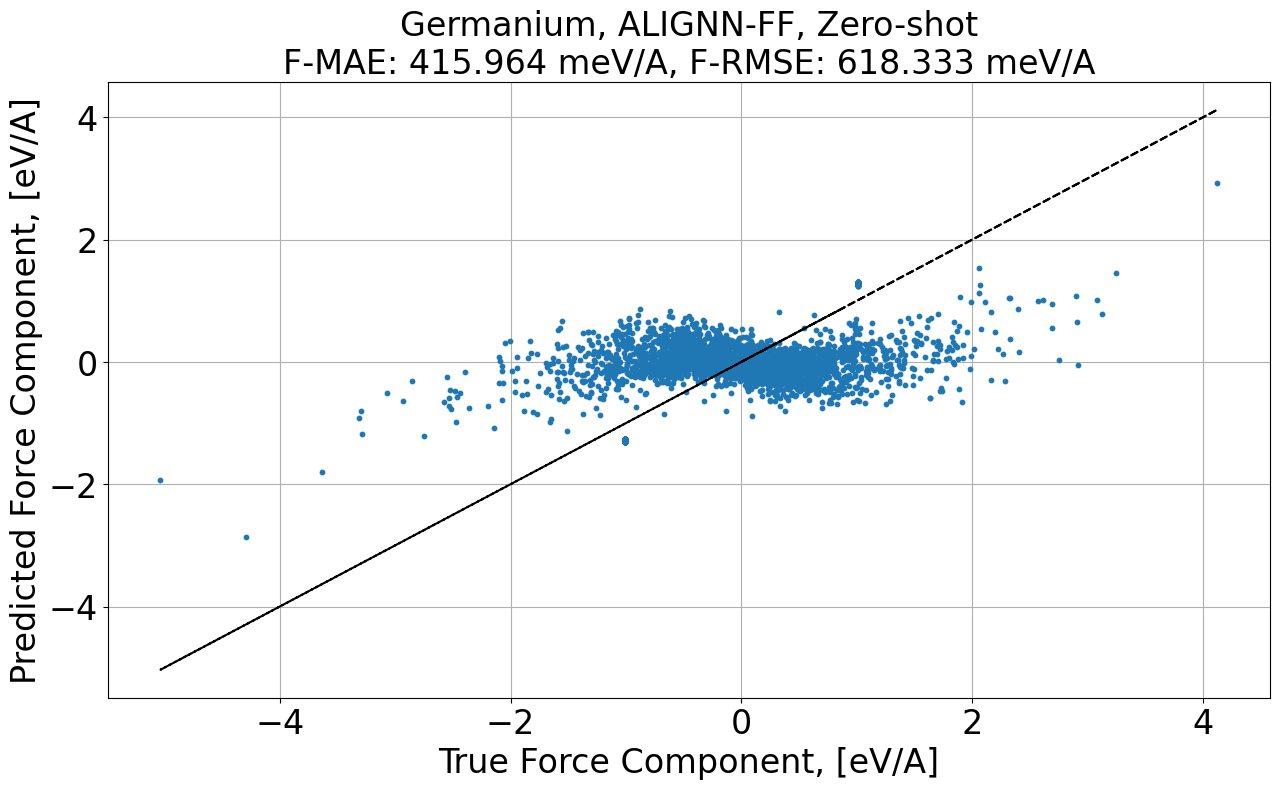

100%|██████████| 25/25 [02:59<00:00,  7.19s/it]


Material: Si, F-RMSE: 1.0671511020524314, F-MAE: 0.7249256129536089


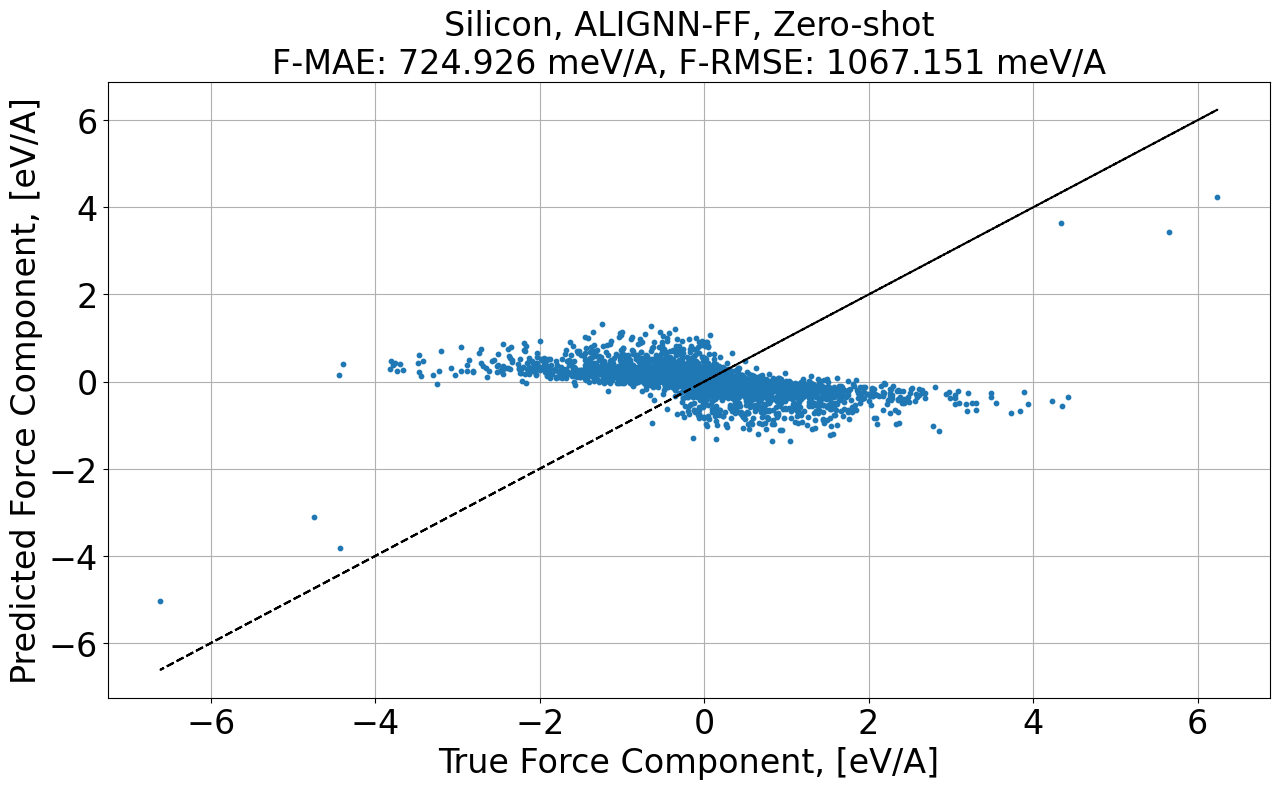

100%|██████████| 29/29 [02:15<00:00,  4.68s/it]


Material: Li, F-RMSE: 0.18837322252060315, F-MAE: 0.14085897965391536


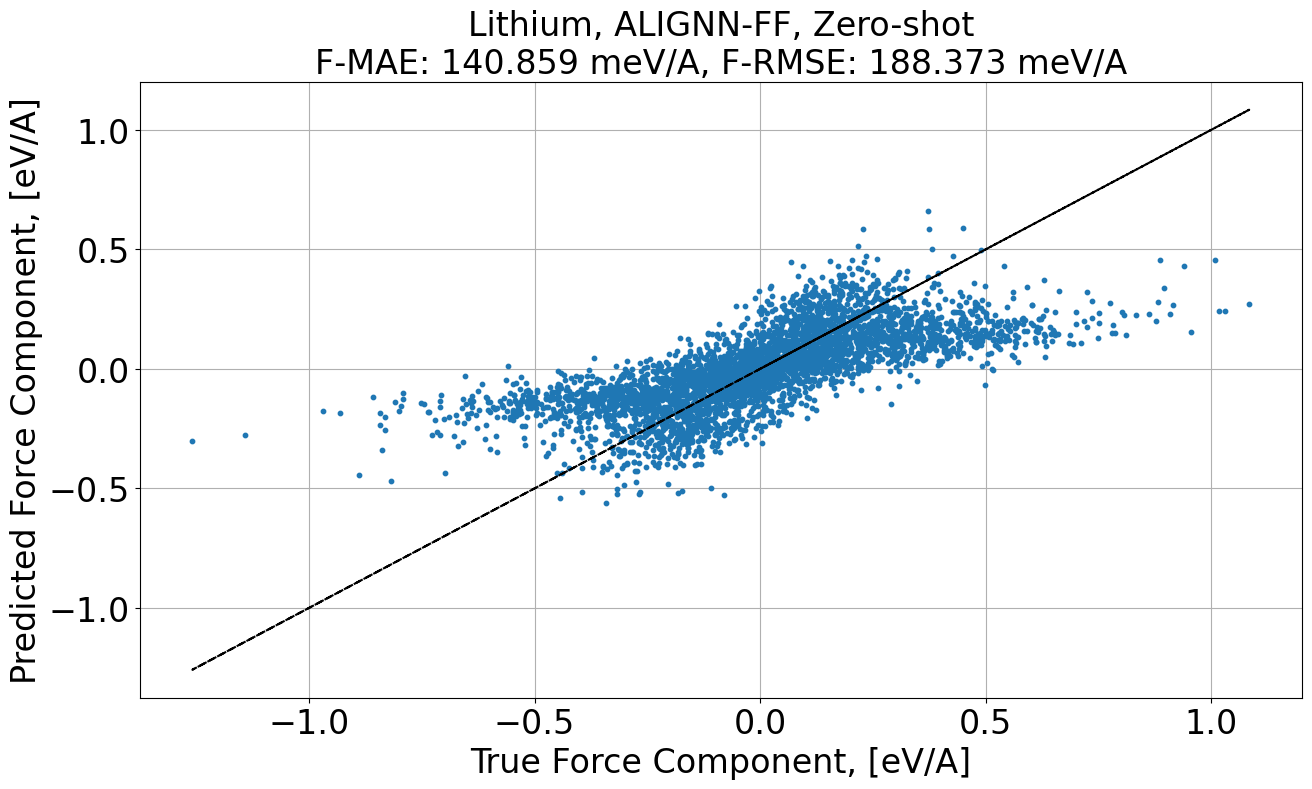

In [12]:
%matplotlib inline
material_dict = {'Ni': 'Nickel', 'Cu': 'Copper', 'Mo': 'Molybdenum', 'Ge': 'Germanium', 'Si': 'Silicon', 'Li': 'Lithium'}
pred_alignn={}
for m in ['Ni', 'Cu', 'Mo', 'Ge', 'Si', 'Li']:
  f = open(f'{m}_test.json')
  test = json.load(f)

  e_true = []
  e_pred = []
  f_true = []
  f_pred = []
  n_atoms_all = []
  
  for ex in tqdm(test):
    s = Structure.from_dict(ex['structure'])
    atoms = aio.AseAtomsAdaptor.get_atoms(s)

    # TODO: understand why this setting tags is required
    atoms.set_tags(np.ones(len(atoms)))
    atoms.calc = calc
    e = atoms.get_potential_energy()
    f = atoms.get_forces()

    e_true.append(ex['outputs']['energy'])
    e_pred.append(e)

    t = np.array(ex['outputs']['forces'])

    f_true.append(t)
    f_pred.append(f)

  f_true_ = np.concatenate(f_true).flatten()
  f_pred_ = np.concatenate(f_pred).flatten()
  print(f'Material: {m}, F-RMSE: {np.sqrt(np.mean(np.power(f_true_ - f_pred_, 2)))}, F-MAE: {np.mean(np.abs(f_true_ - f_pred_))}')

  plt.figure(figsize=(15, 8))
  matplotlib.pyplot.grid(True, which="both")
  plt.scatter(f_true_, f_pred_, s=10)
  plt.plot(f_true_, f_true_, 'k--')
  _ = plt.xlabel('True Force Component, [eV/A]', fontsize=24)
  _ = plt.ylabel('Predicted Force Component, [eV/A]', fontsize=24)
  plt.title(f'{material_dict[m]}, ALIGNN-FF, Zero-shot\nF-MAE: {1000 * np.mean(np.abs(f_true_ - f_pred_)):.3f} meV/A, F-RMSE: {1000 * np.sqrt(np.mean(np.power(f_true_ - f_pred_, 2))):.3f} meV/A', fontsize=24)
  plt.show()
  pred_alignn[m]=[e_true,e_pred,f_true,f_pred,]

100%|██████████| 31/31 [00:28<00:00,  1.08it/s]


Material: Ni, F-RMSE: 0.34216432031222693, F-MAE: 0.14802800712530506


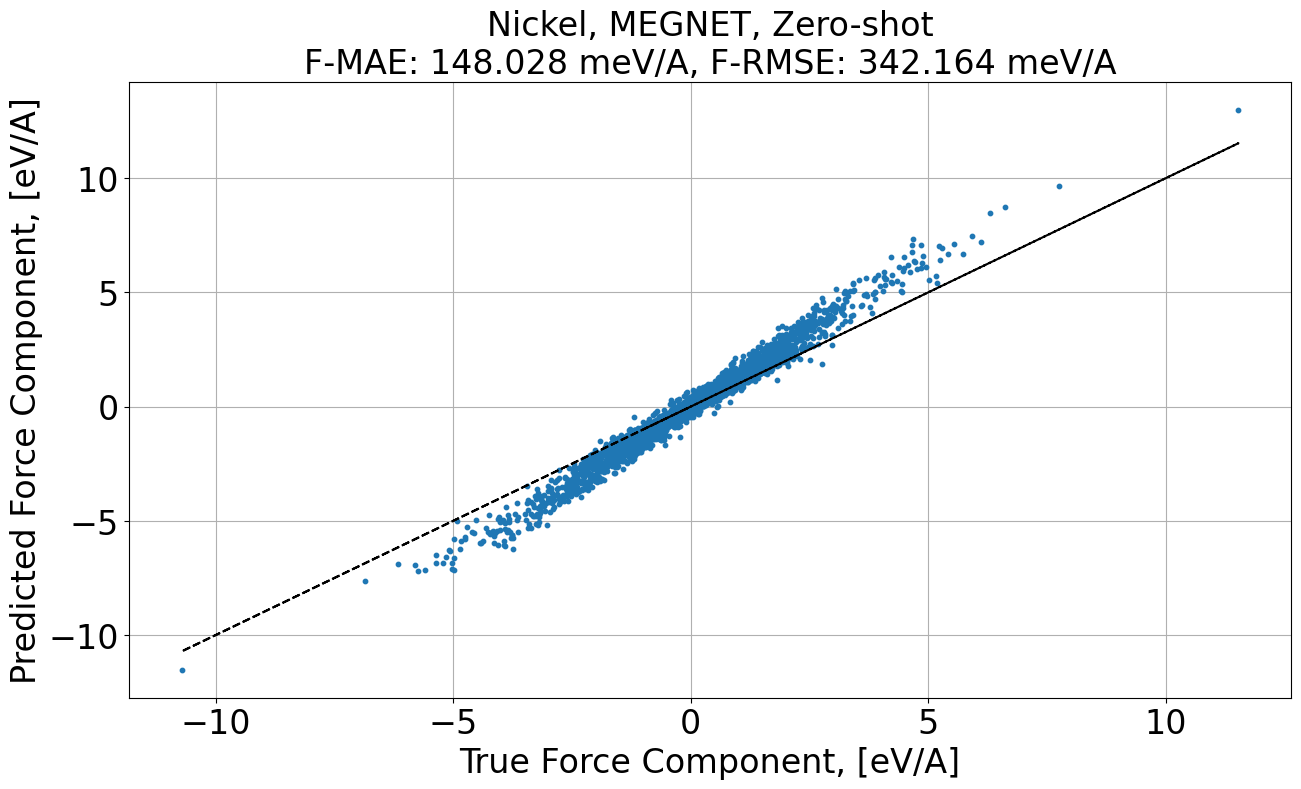

100%|██████████| 31/31 [00:09<00:00,  3.38it/s]


Material: Cu, F-RMSE: 0.15388193671127573, F-MAE: 0.06619169992909771


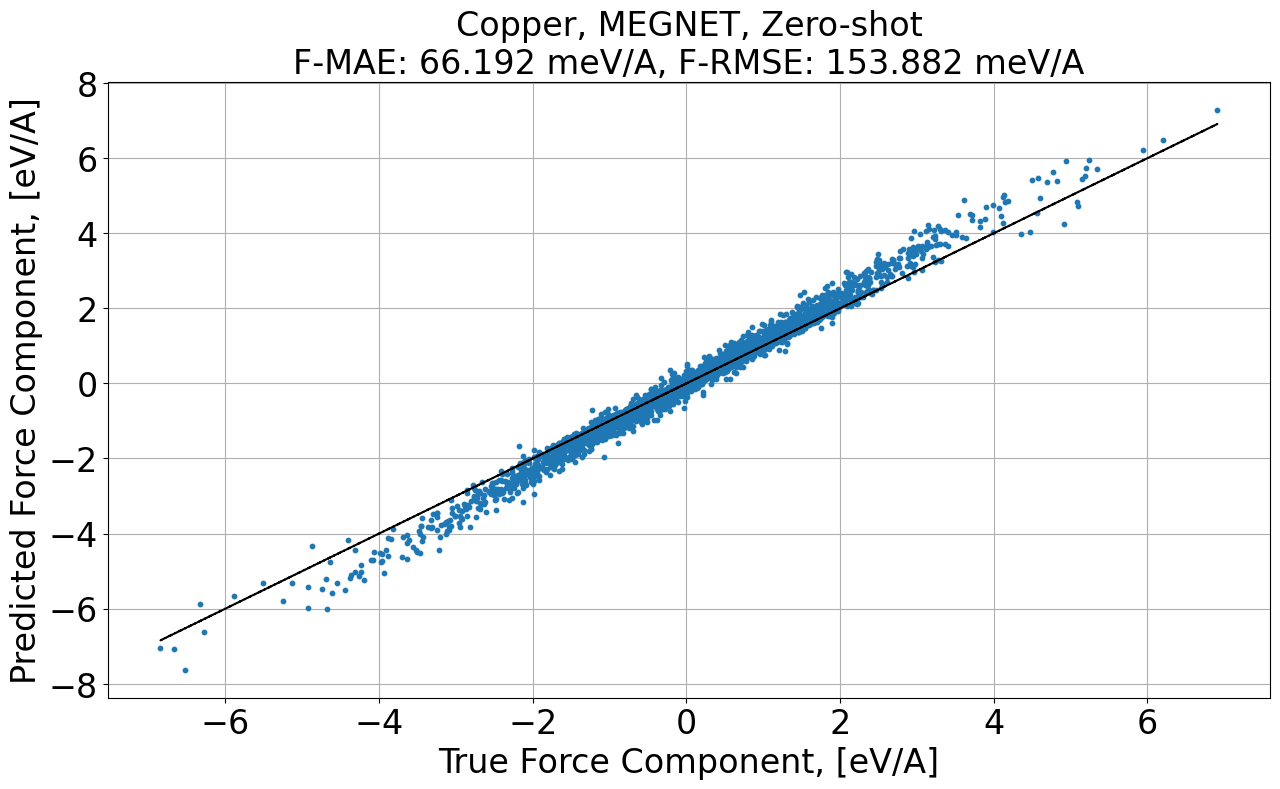

100%|██████████| 23/23 [00:02<00:00, 11.33it/s]


Material: Mo, F-RMSE: 0.5653880718494686, F-MAE: 0.34523581905199435


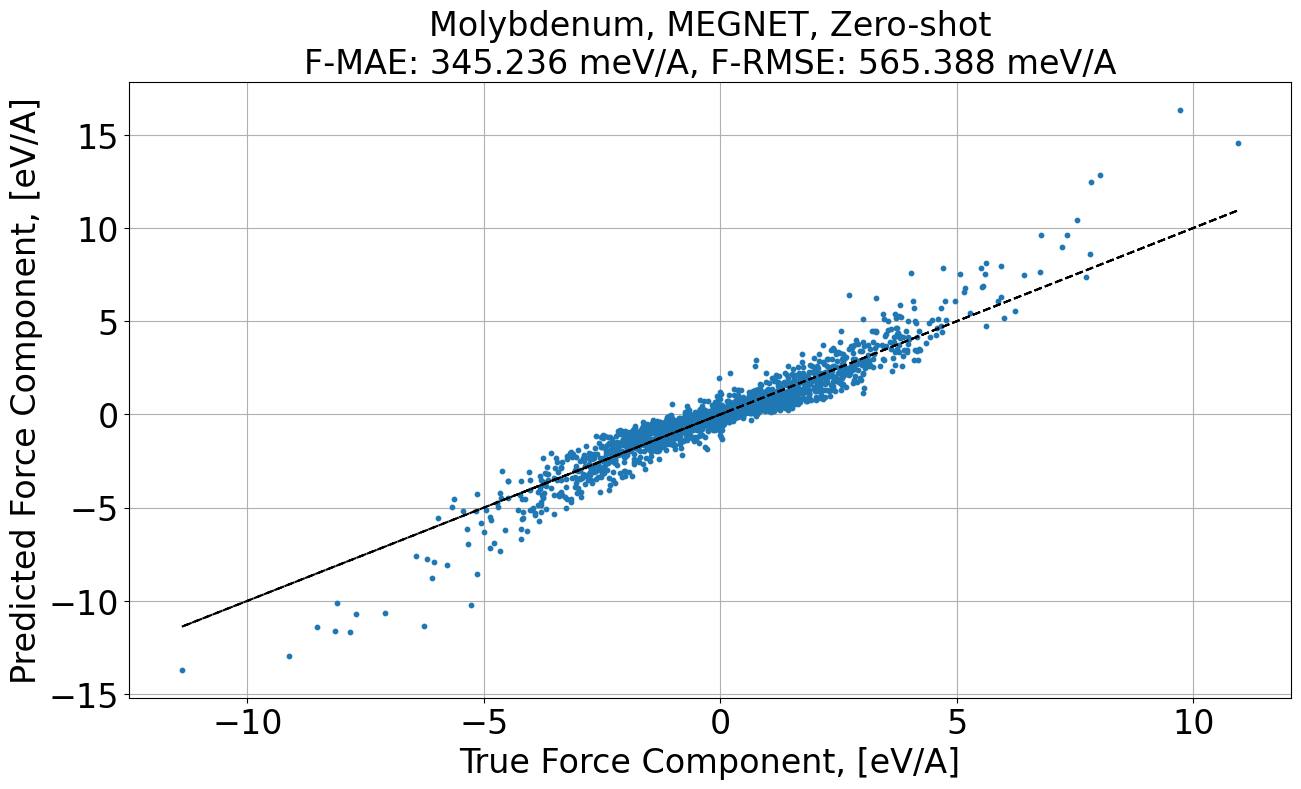

100%|██████████| 25/25 [00:02<00:00, 12.15it/s]


Material: Ge, F-RMSE: 0.5073055613089714, F-MAE: 0.35199417124273846


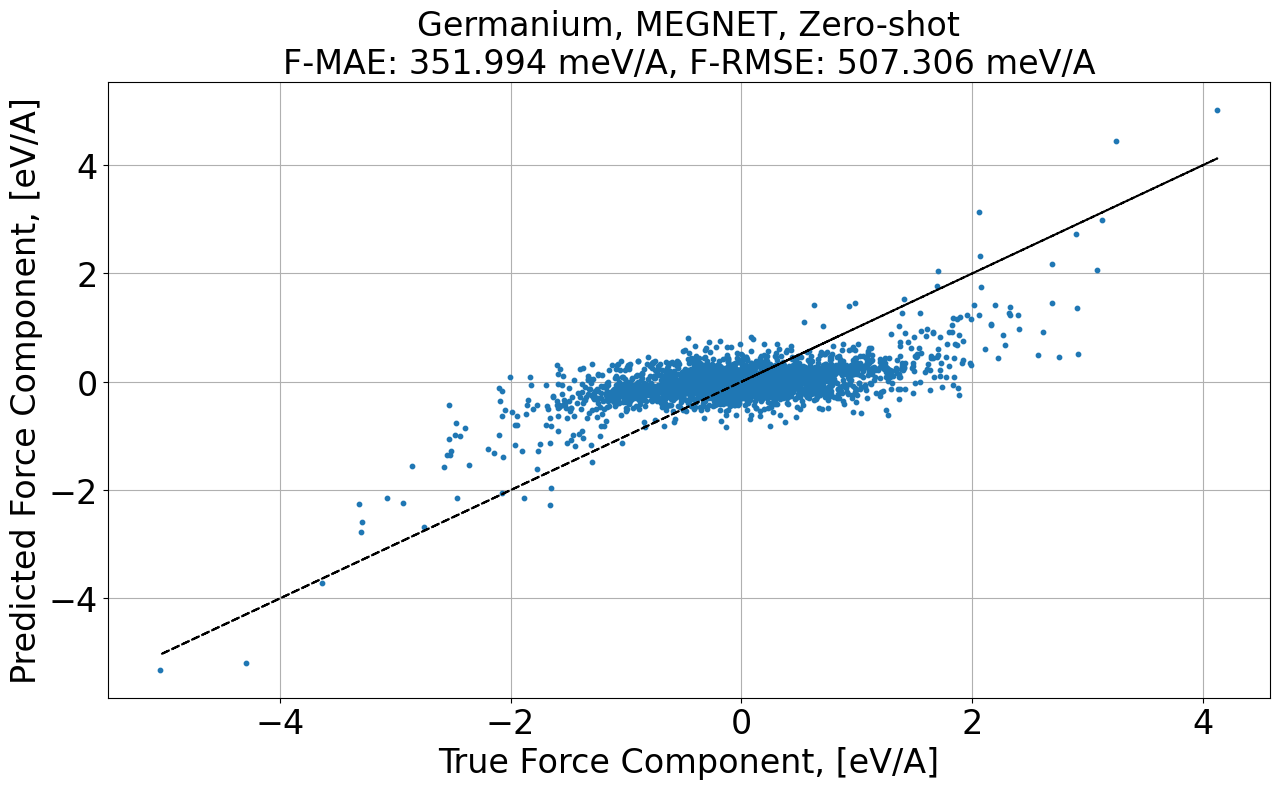

100%|██████████| 25/25 [00:03<00:00,  6.82it/s]


Material: Si, F-RMSE: 0.39671187913890704, F-MAE: 0.2770507257333097


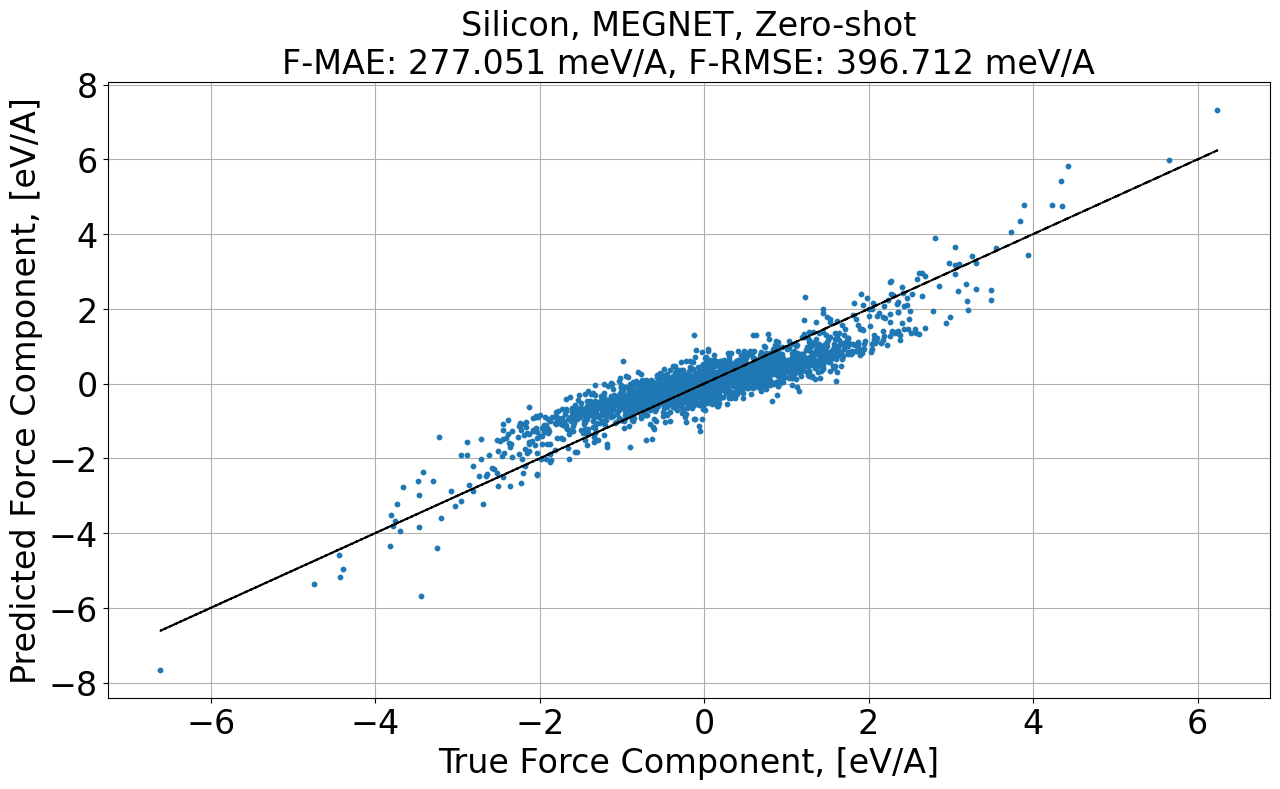

100%|██████████| 29/29 [00:03<00:00,  9.12it/s]


Material: Li, F-RMSE: 0.06980219073524699, F-MAE: 0.05093851396912838


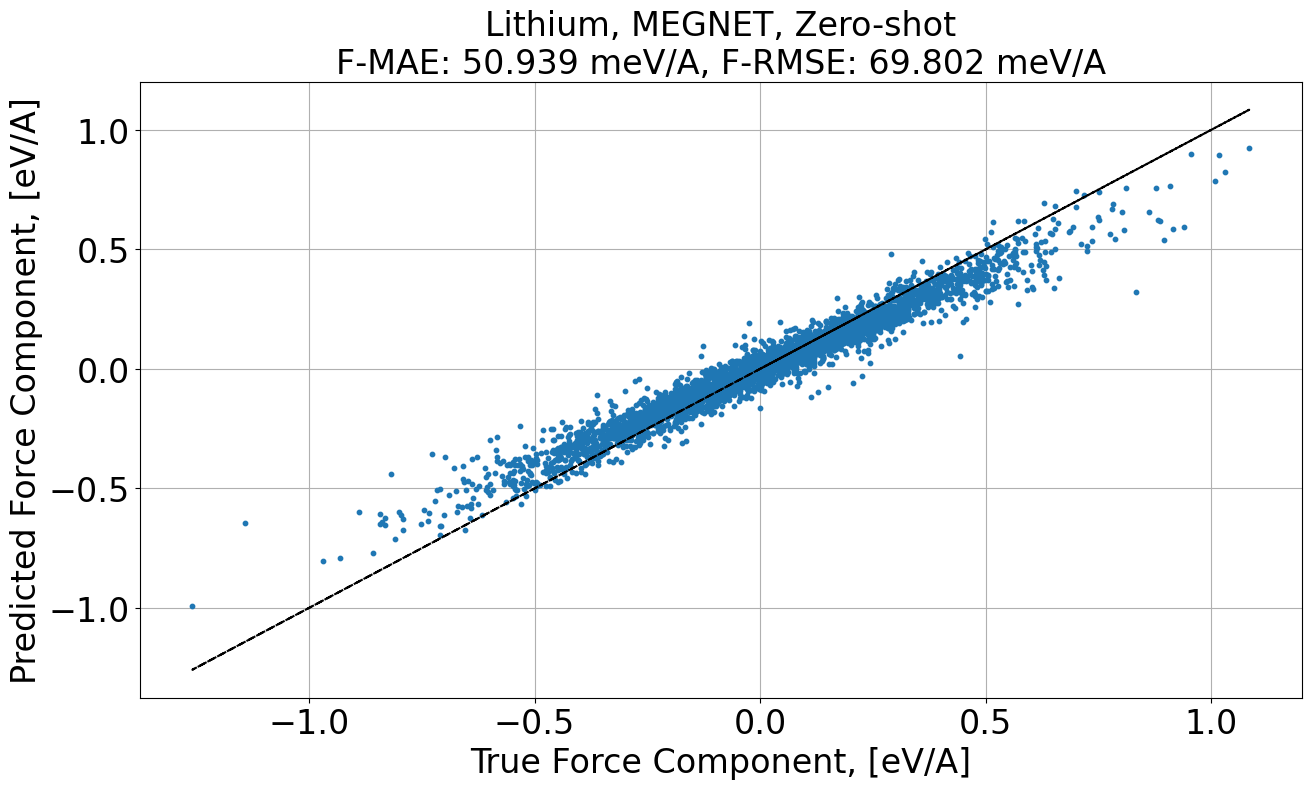

In [13]:
%matplotlib inline
from m3gnet.models import M3GNet, M3GNetCalculator, Potential
potential = Potential(M3GNet.load())
calculator = M3GNetCalculator(potential=potential, stress_weight=0.01)
material_dict = {'Ni': 'Nickel', 'Cu': 'Copper', 'Mo': 'Molybdenum', 'Ge': 'Germanium', 'Si': 'Silicon', 'Li': 'Lithium'}
pred_m3gnet={}
for m in ['Ni', 'Cu', 'Mo', 'Ge', 'Si', 'Li']:
  f = open(f'{m}_test.json')
  test = json.load(f)

  e_true = []
  e_pred = []
  f_true = []
  f_pred = []
  n_atoms_all = []

  for ex in tqdm(test):
    s = Structure.from_dict(ex['structure'])
    atoms = aio.AseAtomsAdaptor.get_atoms(s)

    # TODO: understand why this setting tags is required
    atoms.set_tags(np.ones(len(atoms)))
    atoms.calc = calculator
    e = atoms.get_potential_energy()
    f = atoms.get_forces()

    e_true.append(ex['outputs']['energy'])
    e_pred.append(e)

    t = np.array(ex['outputs']['forces'])

    f_true.append(t)
    f_pred.append(f)

  f_true_ = np.concatenate(f_true).flatten()
  f_pred_ = np.concatenate(f_pred).flatten()
  print(f'Material: {m}, F-RMSE: {np.sqrt(np.mean(np.power(f_true_ - f_pred_, 2)))}, F-MAE: {np.mean(np.abs(f_true_ - f_pred_))}')

  plt.figure(figsize=(15, 8))
  matplotlib.pyplot.grid(True, which="both")
  plt.scatter(f_true_, f_pred_, s=10)
  plt.plot(f_true_, f_true_, 'k--')
  _ = plt.xlabel('True Force Component, [eV/A]', fontsize=24)
  _ = plt.ylabel('Predicted Force Component, [eV/A]', fontsize=24)
  plt.title(f'{material_dict[m]}, MEGNET, Zero-shot\nF-MAE: {1000 * np.mean(np.abs(f_true_ - f_pred_)):.3f} meV/A, F-RMSE: {1000 * np.sqrt(np.mean(np.power(f_true_ - f_pred_, 2))):.3f} meV/A', fontsize=24)
  plt.show()
  pred_m3gnet[m]=[e_true,e_pred,f_true,f_pred,]

In [14]:
from jarvis.db.figshare import data
ff_db=data('alignn_ff_db')
print(len(ff_db))

Obtaining ALIGNN-FF training DB 300k ...
Reference:https://arxiv.org/abs/2209.05554
Loading the zipfile...
Loading completed.
307113


In [15]:
from alignn.ff.ff import default_path,ForceField
from alignn.graphs import Graph
import torch
import os
from jarvis.db.jsonutils import loadjson
from alignn.models.alignn_atomwise import ALIGNNAtomWise,ALIGNNAtomWiseConfig
torch.cuda.is_available = lambda : False
from jarvis.core.atoms import Atoms
from tqdm import tqdm
import numpy as np
from alignn.ff.ff import default_path,ForceField
from jarvis.core.atoms import Atoms
from alignn.ff.ff import AlignnAtomwiseCalculator,default_path
from ase.stress import full_3x3_to_voigt_6_stress
import torch


model_path = default_path()
calc = AlignnAtomwiseCalculator(path=model_path,force_mult_natoms=True)


def get_alignn_forces(atoms=[]):
    ase_atoms=atoms.ase_converter()
    ase_atoms.calc = calc
    e = ase_atoms.get_potential_energy()
    f = ase_atoms.get_forces()
    s = ase_atoms.get_stress()
    return e,f,s

torch.cuda.is_available = lambda : False
mg=[]

al_e=[]
al_f=[]
al_s=[]

t_e=[]
t_f=[]
t_s=[]
#Taking last 25 samples for quick testing
for ii,i in tqdm(enumerate(ff_db[-25:])):
    #if ii<10:
        atoms = Atoms.from_dict(i['atoms'])
        #mg_f = get_m3gnet_forces(atoms)
        #mg.append(np.array(mg_f).flatten())
        e,f,s = get_alignn_forces(atoms)
        al_e.append(e)
        t_e.append(i['total_energy']*atoms.num_atoms)
        
        al_f.append(np.array(f).flatten())
        t_f.append(np.array(i['forces']).flatten())
        ts=full_3x3_to_voigt_6_stress(i['stresses'])
        al_s.append(np.array(s).flatten())
        t_s.append(np.array(ts).flatten())
        


model_path /usr/local/lib/python3.10/dist-packages/alignn/ff


25it [01:15,  3.02s/it]


Text(0, 0.5, 'ALIGNN-FF Forces(eV/A)')

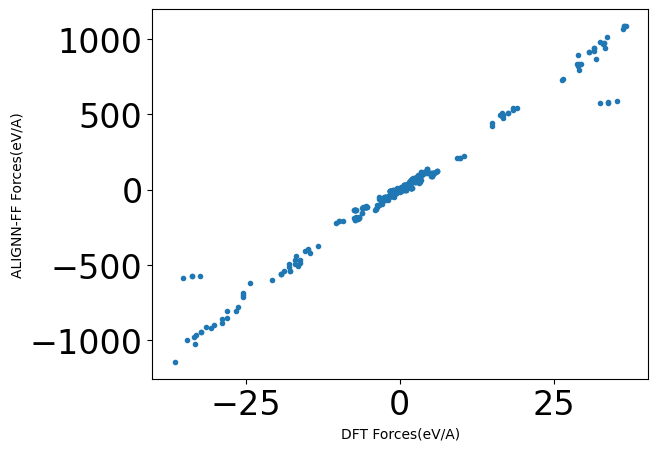

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(np.concatenate(t_f).flatten(),np.concatenate(al_f).flatten(),'.')
plt.xlabel('DFT Forces(eV/A)')
plt.ylabel('ALIGNN-FF Forces(eV/A)')

Text(0, 0.5, 'ALIGNN-FF Stress(eV/A2)')

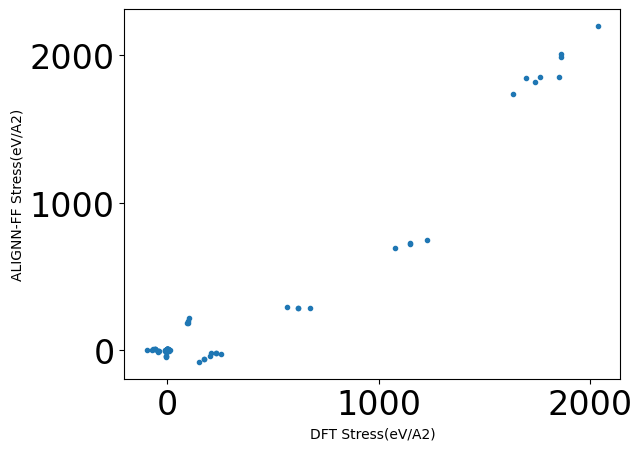

In [18]:
plt.plot(np.concatenate(t_s),-1600*np.concatenate(al_s),'.')
plt.xlabel('DFT Stress(eV/A2)')
plt.ylabel('ALIGNN-FF Stress(eV/A2)')

In [19]:
pip freeze

absl-py==1.4.0
alabaster==0.7.13
albumentations==1.2.1
alignn==2023.4.27
altair==4.2.2
anyio==3.6.2
appdirs==1.4.4
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arviz==0.15.1
ase==3.22.1
astropy==5.2.2
astunparse==1.6.3
attrs==23.1.0
audioread==3.0.0
autograd==1.5
Babel==2.12.1
backcall==0.2.0
beautifulsoup4==4.11.2
bleach==6.0.0
blis==0.7.9
blosc2==2.0.0
bokeh==2.4.3
branca==0.6.0
CacheControl==0.12.11
cached-property==1.5.2
cachetools==5.3.0
catalogue==2.0.8
certifi==2022.12.7
cffi==1.15.1
chardet==4.0.0
charset-normalizer==2.0.12
chex==0.1.7
click==8.1.3
cloudpickle==2.2.1
cmake==3.25.2
cmdstanpy==1.1.0
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.4
cons==0.4.5
contextlib2==0.6.0.post1
contourpy==1.0.7
convertdate==2.4.0
cryptography==40.0.2
cufflinks==0.17.3
cvxopt==1.3.0
cvxpy==1.3.1
cycler==0.11.0
cymem==2.0.7
Cython==0.29.34
dask==2022.12.1
datascience==0.17.6
db-dtypes==1.1.1
dbus-python==1.2.16
debugpy==1.6.6
decorator==4.4.2
defusedxml==0.7.1
dgl==1